<a href="https://colab.research.google.com/github/andreysoas/Machine-Learning-Implementacoes/blob/main/K_MEANS_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import numpy.random as rd
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

#IMPLEMENTATION OF K-MEANS

Feature scaling / Mean Normalization

In [ ]:
def mean_normalization(X):

  means = np.mean(X, axis=0)
  stds = np.std(X, axis=0)
  
  X = X - means
  X = X/stds

  return X

K-means

In [ ]:
class dupla_struct:
  def __init__(self,cl_i,distance):
    self.cl_i = cl_i
    self.distance = distance

class k_means:
  def __init__(self,X,K): #where X = dataset(mxn),K = number of clusters
    self.K = K
    self.X = X
    self.m,self.n = X.shape # number of examples
    self.centroids_labels = np.arange(0,self.K)
    self.centroids = self.initialize_clusters_by_kplus()
    self.x_clusters = [dupla_struct(-1,9999) for i in range(X.shape[0])] #clusters id inicialization

  def initialize_clusters_default(self): #Random Inicialization
    id_rd = sample([i for i in range(0,self.X.shape[0])],self.K)
    to_return = []

    for i in id_rd:
      to_return.append(np.copy(self.X[i]))
    
    return np.array(to_return)

  def initialize_clusters_by_kplus(self): #K++ Inicialization
    center_initial = np.copy(self.X[rd.randint(0,self.m)])
    centers_return = np.zeros((self.K,self.n))
    centers_return[0,:] = center_initial

    for i in range(self.K-1):
      min_dists = np.zeros(self.m)
      
      for j in range(self.m):
        min_dists[j] = self.find_min(j,i,centers_return)

      sum_amostral = sum(min_dists)
      selected_center = rd.choice(np.arange(0,self.m),p=min_dists/sum_amostral,size=1)[0]
      centers_return[i+1,:] = np.copy(self.X[selected_center,:])

    return centers_return

  def find_min(self,j_,i_,centers_return):
    minimum = 999999
    for i in range(i_+1):
      dist = sum((self.X[j_] - centers_return[i])**2)
      if dist < minimum: minimum = dist

    return minimum

  def train_model(self):
    while True:
      if self.run_train_model(): break
  
  def run_train_model(self): 
    move_centroids = np.zeros(self.K)
    centroid_save = np.zeros(self.X.shape[1])

    for i in range(self.m):
      for j in range(self.K):
        dist = sum((self.X[i] - self.centroids[j])**2)
        if dist < self.x_clusters[i].distance: 
          self.x_clusters[i].cl_i = j
          self.x_clusters[i].distance = dist
    
    for i in range(self.K): 
      
      for nothing in range(self.n):centroid_save[nothing] = self.centroids[i,nothing]
      n_on_cluster = 0

      self.centroids[i] = self.centroids[i] - self.centroids[i]
      for j in range(self.m):
        if self.x_clusters[j].cl_i == i:
          n_on_cluster += 1
          self.centroids[i]+=self.X[j]
      
      if n_on_cluster != 0:
        self.centroids[i] = self.centroids[i]/n_on_cluster

      if sum(self.centroids[i] - centroid_save) != 0:
        move_centroids[i] = 1
    print(move_centroids)
    if 1 not in move_centroids: return True

    '------------------------Plot of iteration---------------------' #2D
    plt.figure()
    plt.scatter(self.X[:,0],self.X[:,1],color='blue',marker='x')
    plt.scatter(self.centroids[:,0],self.centroids[:,1],color='red')
    plt.show()
    '--------------------------------------------------------------'

    return False


#Iris - intro example

In [ ]:
iris = datasets.load_iris()
cluster = KMeans(n_clusters = 3,algorithm='elkan') #3grupos Não gera ruído ( agrupa todos os elementos )
cluster.fit(iris.data)

KMeans(algorithm='elkan', n_clusters=3)

In [ ]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

[1. 1. 1.]


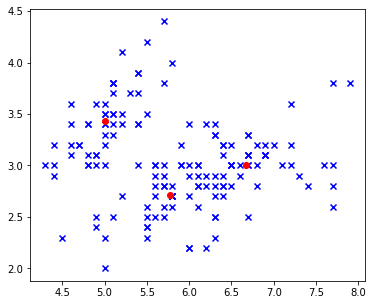

[1. 0. 1.]


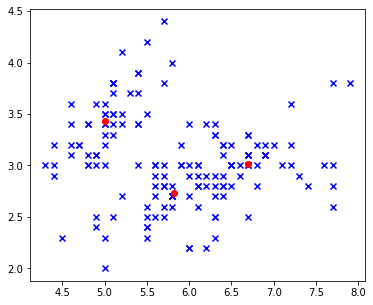

[1. 0. 1.]


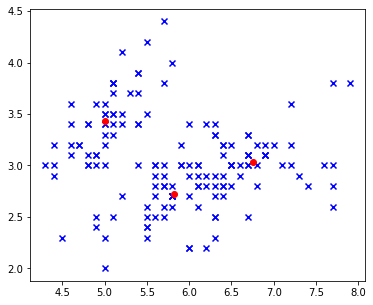

[1. 0. 1.]


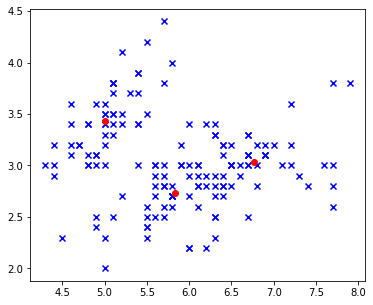

[0. 0. 0.]


In [ ]:
plt.rcParams['figure.figsize'] = (6,5)
model = k_means(iris.data,3)
model.train_model()

In [ ]:
model.centroids

array([[6.76956522, 3.03695652, 5.6       , 2.00869565],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.82962963, 2.73148148, 4.31481481, 1.39259259]])

<Figure size 1080x360 with 0 Axes>

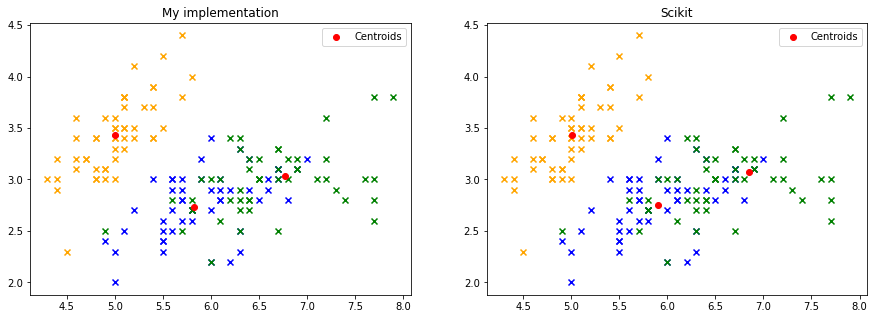

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

plt.figure()

plt.subplots()

plt.subplot(1,2,1)
plt.scatter(iris.data[:50,0],iris.data[:50,1],marker='x',color='orange')
plt.scatter(iris.data[50:100,0],iris.data[50:100,1],marker='x',color='blue')
plt.scatter(iris.data[100:150,0],iris.data[100:150,1],marker='x',color='green')

plt.scatter(model.centroids[:,0],model.centroids[:,1],color='red',label='Centroids')

plt.title('My implementation')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(iris.data[:50,0],iris.data[:50,1],marker='x',color='orange')
plt.scatter(iris.data[50:100,0],iris.data[50:100,1],marker='x',color='blue')
plt.scatter(iris.data[100:150,0],iris.data[100:150,1],marker='x',color='green')

plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1],color='red',label='Centroids')

plt.title('Scikit')
plt.legend()

plt.show()

In [ ]:
a = []
for i in range(model.m):
  a.append(model.x_clusters[i].cl_i)

np.unique(np.array(a),return_counts=True)

(array([0, 1, 2]), array([46, 50, 54]))

In [ ]:
np.unique(cluster.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

3D PLOT

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

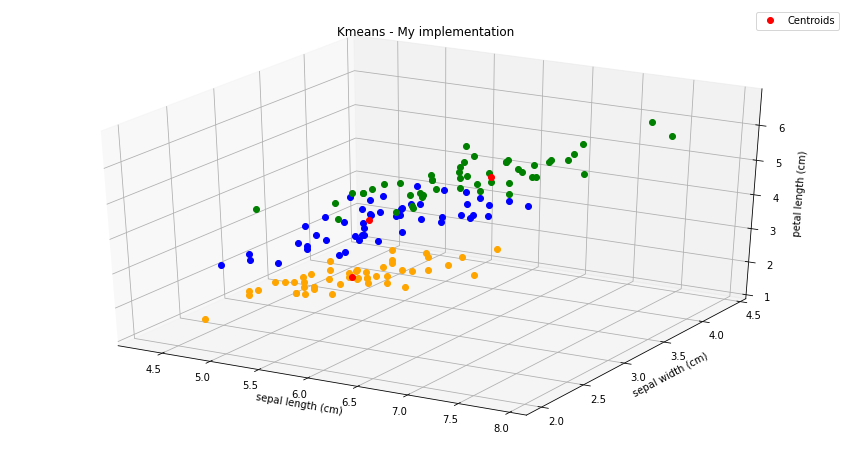

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(projection='3d')

ax.plot(iris.data[:50,0],iris.data[:50,1],iris.data[:50,2],'ob',color='orange')
ax.plot(iris.data[50:100,0],iris.data[50:100,1],iris.data[50:100,2],'ob',color='blue')
ax.plot(iris.data[100:150,0],iris.data[100:150,1],iris.data[100:150,2],'ob',color='green')

ax.plot(model.centroids[:,0],model.centroids[:,1],model.centroids[:,2],'ob',color='red',label='Centroids')

#ax.set_title("Data Analysis ")
ax.set_ylabel(iris.feature_names[1])
ax.set_xlabel(iris.feature_names[0])
ax.set_zlabel(iris.feature_names[2])
plt.title('Kmeans - My implementation')
plt.legend()
plt.show()

#US Arrests by state - example

Nesta aplicação utilizamos os dados do dataset 'US_violent_crime.csv'.
Disponível em: \url{https://www.kaggle.com/datasets/mathchi/violent-crime-rates-by-us-state?resource=download}

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)

dataframe = pd.read_csv('/content/US_violent_crime.csv')
dataframe.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
dataframe.shape
dataframe = dataframe.rename({'Unnamed: 0':'State'},axis=1)
dataframe.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

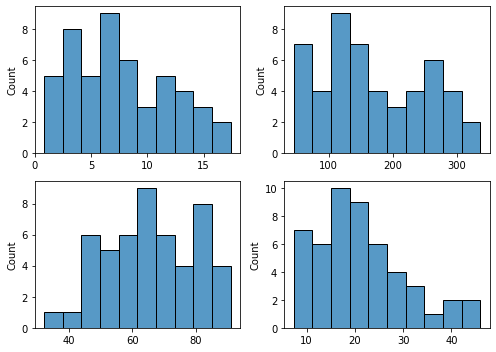

In [ ]:
plt.subplots()

plt.subplot(2,2,1)
sns.histplot(dataframe['Murder'].values,bins=10)
plt.subplot(2,2,2)
sns.histplot(dataframe['Assault'].values,bins=10)
plt.subplot(2,2,3)
sns.histplot(dataframe['UrbanPop'].values,bins=10)
plt.subplot(2,2,4)
sns.histplot(dataframe['Rape'].values,bins=10)

plt.tight_layout()
plt.show()

Nota-se a necessidade da aplicação de normalização para os dados, visto o intervalo de comparação em que as variáveis se encontram.

In [ ]:
data = np.array(dataframe.values[:,1:],dtype=float)
data = mean_normalization(data)

In [ ]:
print(f'Max:{data.max()} , Min:{data.min()}')

Max:2.6711969960770587 , Min:-2.340661149758242


A ideia é identificar quais estados são mais seguros para se morar, e quais estados têm índices de criminalidade mais elevados, ou seja, são menos seguros.

[1. 1.]


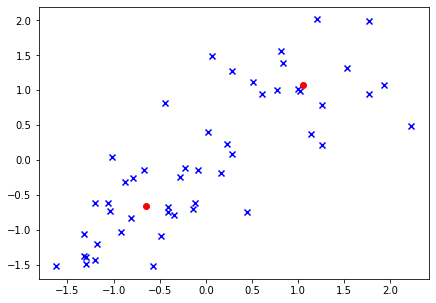

[0. 0.]


In [ ]:
model = k_means(data,2)
model.train_model()

In [ ]:
clis = []
for i in model.x_clusters:
  clis.append(i.cl_i)

df_results = pd.DataFrame({'state':dataframe['State'].values,'id':clis})

In [ ]:
df_results.head()

,state,id
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1


In [ ]:
np.unique(clis,return_counts=True)

(array([0, 1]), array([31, 19]))

In [ ]:
dataframe = dataframe.merge(df_results,left_on='State',right_on='state',how='inner')
dataframe = dataframe.drop('state',axis=1)
dataframe.head()

,State,Murder,Assault,UrbanPop,Rape,id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


Médias para cada conjunto em cada um dos marcadores abordados

In [ ]:
dataframe.groupby('id').mean()

,Murder,Assault,UrbanPop,Rape
id,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


Notamos então, que o conjunto 1 é composto pelos estados menos seguros de residir

<Figure size 504x360 with 0 Axes>

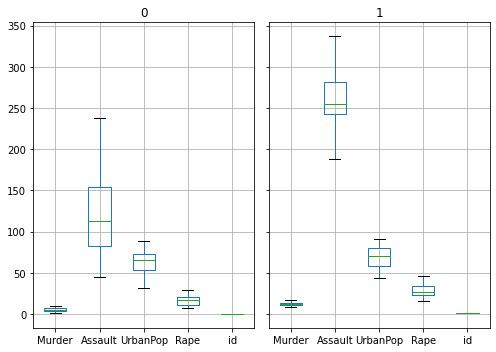

In [ ]:
plt.figure()
dataframe.groupby('id').boxplot()
plt.tight_layout()
plt.show()

O que é fortemente apontado pelos boxplots para cada identificador

In [ ]:
dataframe.loc[dataframe['id'] == 1,'id'] = 'Non-safe state'
dataframe.loc[dataframe['id'] == 0,'id'] = 'Safe state'

dataframe.head()

,State,Murder,Assault,UrbanPop,Rape,id
0,Alabama,13.2,236,58,21.2,Non-safe state
1,Alaska,10.0,263,48,44.5,Non-safe state
2,Arizona,8.1,294,80,31.0,Non-safe state
3,Arkansas,8.8,190,50,19.5,Safe state
4,California,9.0,276,91,40.6,Non-safe state


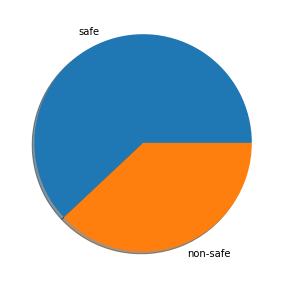

In [ ]:
plt.figure()
plt.pie(np.unique(clis,return_counts=True)[1],labels=['safe','non-safe'],shadow=True)
plt.show()